In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

#--입력, 정답 벡터 생성(one-hot encoding)--
input_data = []
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x):  # y값이 sin 곡선 아래에 있으면
            correct_data.append([0, 1])  # 아래 영역
        else:
            correct_data.append([1, 0])  # 위 영역
            
n_data = len(correct_data)  # 데이터 수

input_data = np.array(input_data)
correct_data = np.array(correct_data)

In [3]:
n_in = 2  # 입력층 뉴런 수
n_mid = 6  # 은닉층 뉴런 수
n_out = 2  # 출력층 뉴런 수

wb_width = 0.01  # 가중치와 편향 설정을 위한 정규분포 표준편차
eta = 0.05  # 학습률
epoch = 101
interval = 10  # 경과 표시 간격

In [4]:
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)  # 가중치(행렬）
        self.b = wb_width * np.random.randn(n)  # 편향（벡터）

    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u))  # 시그모이드 함수
    
    def backward(self, grad_y):
        delta = grad_y * (1-self.y)*self.y
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0) # 배치 내의 총합
        
        self.grad_x = np.dot(delta, self.w.T) 
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [5]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)  # 가중치（행렬）
        self.b = wb_width * np.random.randn(n)  # 편향（벡터）
    
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)  # 소프트맥스 함수 ** 배치사이즈 X 1 형태의 행렬을 유지하기 위해 keepdims=True 사용
    
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 

    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [6]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

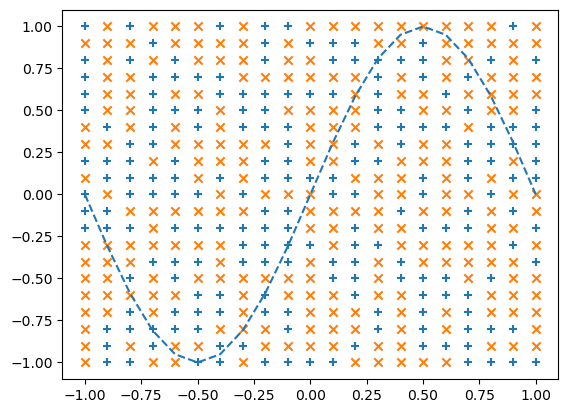

Epoch:0/101 Error:0.7001810847437548


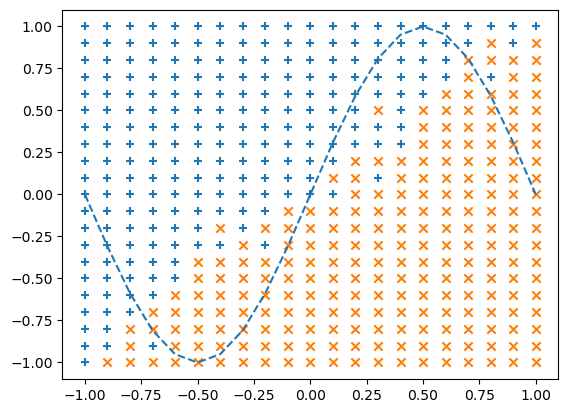

Epoch:10/101 Error:0.414468502836054


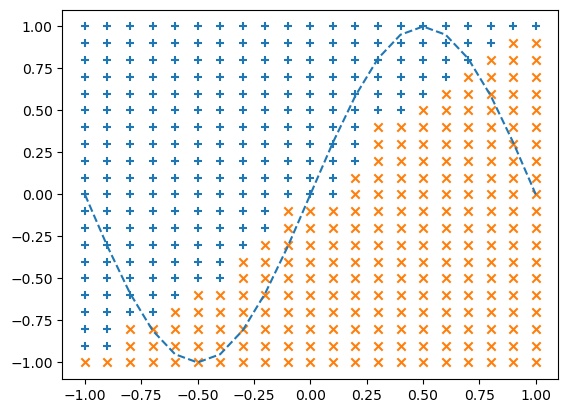

Epoch:20/101 Error:0.3717531223517618


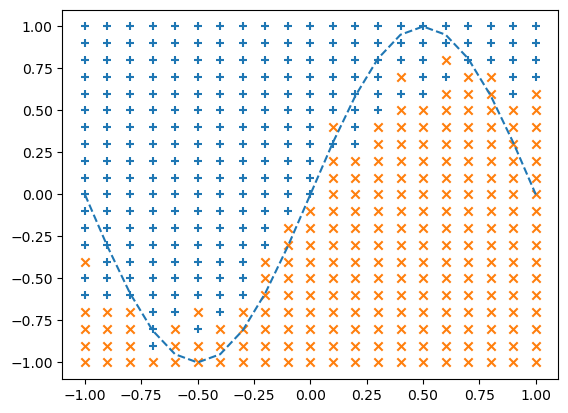

Epoch:30/101 Error:0.27241218473316564


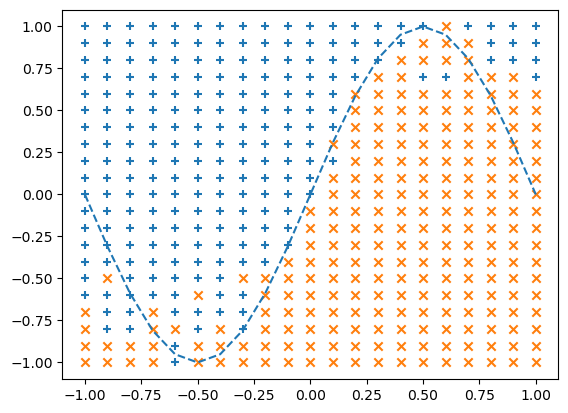

Epoch:40/101 Error:0.22967279511647568


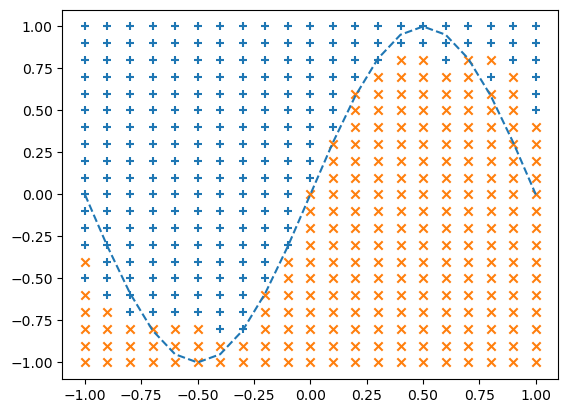

Epoch:50/101 Error:0.20075977982134807


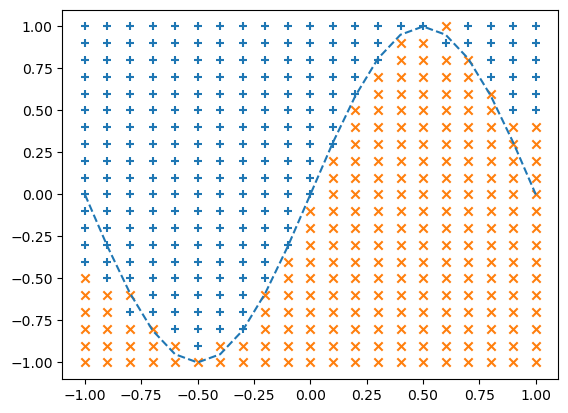

Epoch:60/101 Error:0.1723346575672158


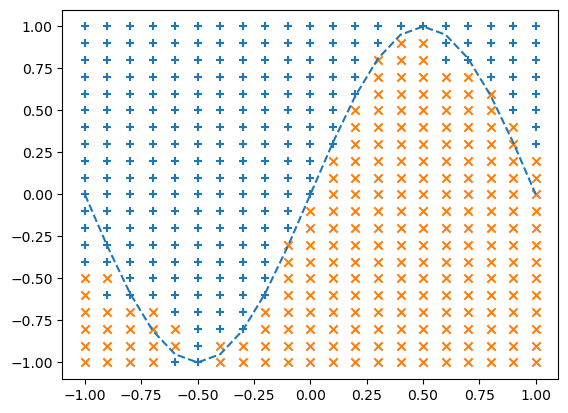

Epoch:70/101 Error:0.1524380876615958


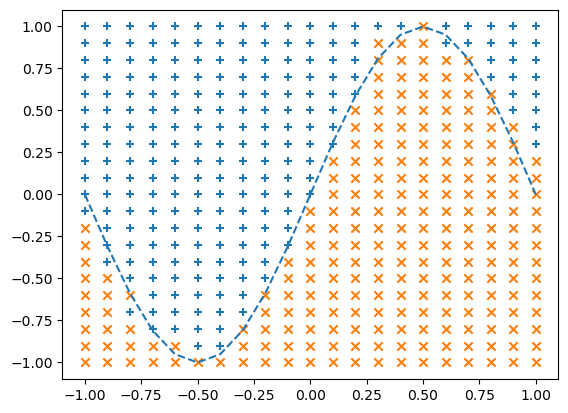

Epoch:80/101 Error:0.12533845335308136


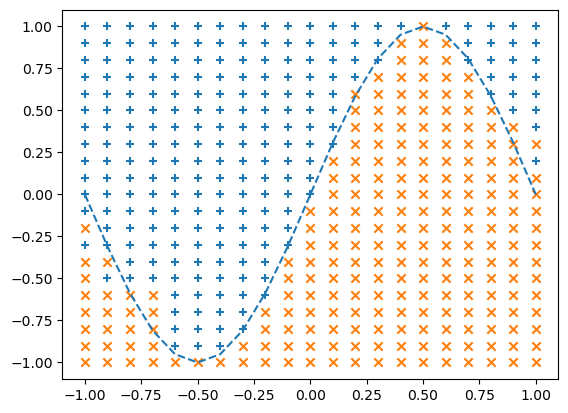

Epoch:90/101 Error:0.10936251395521188


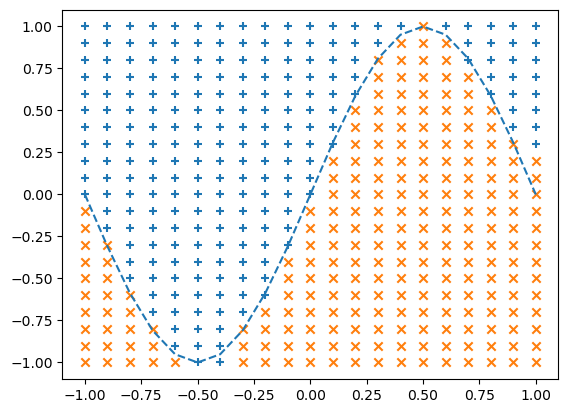

Epoch:100/101 Error:0.09835683881752433


In [7]:
sin_data = np.sin(np.pi * X) # 결과 검증용
for i in range(epoch):

    # 인덱스 임의 섞기
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 결과 표시용
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
       
    for idx in index_random:
        
        x = input_data[idx]
        t = correct_data[idx]

        # 순전파
        middle_layer.forward(x.reshape(1,2))
        output_layer.forward(middle_layer.y)

        # 역전파
        output_layer.backward(t.reshape(1,2))
        middle_layer.backward(output_layer.grad_x)
        
        # 가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            
            y = output_layer.y.reshape(-1)  # 행렬을 벡터로 되돌림
            
            # 오차 계산
            total_error += - np.sum(t * np.log(y + 1e-7)) # 교차 엔트로피 오차
            
            # 확률 크기를 비교하여 분류
            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])
            
    if i%interval == 0:
        
        # 출력 그래프 표시
        plt.plot(X, sin_data, linestyle="dashed")
        plt.scatter(x_1, y_1, marker="+")
        plt.scatter(x_2, y_2, marker="x")
        plt.show()
        
        # 에포크 수와 오차 표시
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))